# Convolutional Neural Networks

Joe Samyn and Collin Stratton

CST-435

Professor James Gordon

## Introduction

In the realm of deep learning, convolutional neural networks are a class of deep neural networks that are most commonly applied to analyze images. These neural networks take an input image, assign importance (learnable weights and biases) to various aspects/objects in the image, and use these weights and biases to differentiate one image from another. The preprocessing steps in a CNN are much smaller than many other classification algorithms. The architecture of a CNN is very similar to a multilayered perceptron. There are layers comprised of multiple perceptrons that fire when they produce an output above a certain threshold. This notebook will utilize a convolutional neural network to classify images from the CIFAR dataset. The goal is to create a network that can classify images with at least 70% accuracy. 

### CNN New Concepts
Convolutional neural networks are a type of neural network similar to a multilayer perceptron. They maintain a lot of the same characteristics and still use multiple layers to construct a network that can perform a task accurately and efficiently. There are four key concepts that differentiate a convolutional neural network from an artificaul neural network: image data, convolutional layer, pooling layer, and the CNN base architecture. 

#### Image Data
Convolutional neural networks are primarily used to classify image data. So, the primary input being deconstructed and manipulated are matrices if pixel data from the image. This input data is typically made up of three dimensions, the height of the image, the width of the image, and the color channels that make up the image. The color channel represents which colors are used to make up the image. For example, an image with an RGB color channel has three values that make up every pixel, a red value, green value, and blue value. Typically these values range from 0-255. So, a particular pixel will have the following data that represents its color channel (20, 155, 110). 

#### Convolutional Layers
Every CNN is made up of at least one convolutional layer. These convolutional layers are tasked with the job of finding patterns within images that can be used to classify the entire image or parts of the image. They are similar to a dense layer in an ANN. The difference being that dense layers look for global patterns while convolutional layers look for local patterns. 

#### Convolutional Neural Network Base Architecture
CNN's typically are comprised of many convolutional layers. Even very basic examples that are performing simple classification are made up of three or more convolutional layers. These layers work together to help increase the accuracy and performance of the network. For example, one layer might be responsible for detecting lines with certain lengths or angles. The next layer would be responsible for taking these layers and attempting to form shapes or polygons that can assist with performing an accurate classification. This pattern continues throughout the convolutional layers. The layers in a CNN are defines by two key parameters: filters and sample size. 

##### Filters 
A filter is an m x n pattern of pixels that matches our search criteria in an image. The output of filters is essentially a matrix representing the layers and a value indicating whether that filter was found in the particular layer or not. 

##### Sample Size
Sample size is essentially the size block that each layer will be analyzing. A block is the m x n pixel grid that is being passed into the layer. For example a 3x3 block is a 3 pixel by 3 pixel piece of an image that is being analyzed in a layer. 

#### Pooling
A pooling layer is a layer that is responsible for down sampling a feature map and reducing their dimensions. 

### Data Set
The data set that was chosen for this example is the CIFAR image data set. The CIFAR dataset contains 60,000 32x32 color images of 10 different categories of every day objects. The 10 different classes of images are:
- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck


In [1]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

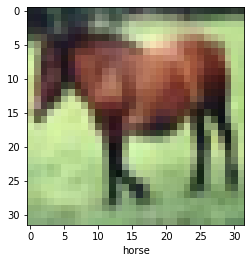

In [5]:

# Load image data from remote repository
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

IMG_INDEX = 7 

# Display image at index 7
plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)

# Add X label 
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])

# Display the image using matplot lib
plt.show()

### Layers
#### Layer 1
The images are 32 x 32 x 3. This means we have a width of 32 pixels, height od 32 pixels, and a color channel of 3 values (r, g ,b).  The first layer will take this input data shape and process 32 filters of size 3x3. The activation function being used is a rectified linear unit. This activation function outputs the calculated output if it is positive. If it is negative it outputs a 0. 

#### Layer 2
This layer will perform a pooling operation of 2x2 samples with a stride of 2. 

#### Layer 3
Another convolutional layer that increases the filters being used from 32 to 64 filters of size 3 x 3. The ReLU activation function is being used to determine the output. 

#### Layer 4
Another pooling operation of 2x2 samples with a stride of 2. 

#### Layer 5
Another convolutional layer that increases the filters being used from 32 to 64 filters of size 3 x 3. The ReLU activation function is being used to determine the output. 

In [10]:
# Add convolutional base to network
model = models.Sequential()

# Add a convulotional 2D layer using the ReLU activation function
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Perform max pooling operation using 2x2 samples and a stride of 2
model.add(layers.MaxPooling2D((2, 2)))

# Add 3 more layers increading frequency of filters from 32 to 64
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Print the summary of the model that has been created so far
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


### Add Dense Layers
Now that we have the convolutional layers in place, we need to add some layers that will actually perform the classification. We use these dense layers to flatten our data to a 64-node dense layer and feed it into a 10 neuron output layer. We use 10 neurons for output because we have 10 different classes we are trying to use for classification. There are other methods for determining the number of output neurons, for example using 4 binary perceptrons and output binary numbers between 1 and 10, but for the sake of simplicity we will use one output neuron for each category. 

In [11]:
# Adding Dense Layers
# Flatten the layers from 32x32 to 64
model.add(layers.Flatten())

# Add a dense layer with 64 nodes using the ReLU activation function
model.add(layers.Dense(64, activation='relu'))

# Add second dense output layer with 10 neurons
model.add(layers.Dense(10))

# show updated summary of model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)               

### Training the Model
Now that we have a basic model compiled, we need to train the model on the training data. The optimization algorithm being used is adaptive moment estimation (adam). The metric that we are most interested in is the accuracy. Therefore, we tell tensorflow to output this accuracy value after each epoch. The fitting of the model will use 10 epochs. This model was run mutliple times with a different amount of epochs used each time. After 10 epochs, diminishing returns begin to appear. Finally, once the training is completed, the model is validated using the validation data set. 

In [14]:
# TRAINING
# build the model using the ADAM optimization technique and display the accuracy metrix. 
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Fit the model using the training images that were obtained in the data download step
history = model.fit(train_images, train_labels, epochs=10,
validation_data=(test_images, test_labels)) # validate the model using the test images and labels

Epoch 1/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.8838 - accuracy: 0.6901 - val_loss: 0.9130 - val_accuracy: 0.6855
Epoch 2/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8285 - accuracy: 0.7103 - val_loss: 0.9391 - val_accuracy: 0.6770
Epoch 3/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7824 - accuracy: 0.7272 - val_loss: 0.8840 - val_accuracy: 0.6968
Epoch 4/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7384 - accuracy: 0.7407 - val_loss: 0.9477 - val_accuracy: 0.6809
Epoch 5/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.6993 - accuracy: 0.7559 - val_loss: 0.8781 - val_accuracy: 0.7060
Epoch 6/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6583 - accuracy: 0.7693 - val_loss: 0.8959 - val_accuracy: 0.7066
Epoch 7/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.6207 - accuracy: 0.7811 - val_loss: 0.8957 -

### Results
The convolutional neural network that was built in this example had an accuracy of 70%. There are things that could be done to help increase the accuracy of the network. One area that could be investigated is the activation functions used in the convolutional layers. Every convolutional layer uses the ReLU activation function, however different activation functions could be used to determine the best one for this group of images. There could also be more convolutional layers added to help target more features in the image. This route was not explored because we were trying to keep computation times at a minimum. 

In [15]:
# Calculate the estimated loss, accuracy using the evaluate method
est_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# show the test results
print(test_acc)

313/313 - 1s - loss: 0.9447 - accuracy: 0.7099
0.7099000215530396


## References
Brownlee, J. (2020, August 20). A Gentle Introduction to the Rectified Linear Unit (ReLU). Machine Learning Mastery. https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/CS231n 
<br>
Convolutional Neural Networks for Visual Recognition. (n.d.). Cs231n.Github.Io. Retrieved October 14, 2021, from https://cs231n.github.io/convolutional-networks/Pai, A. (2020, October 19). 
<br>
ANN vs CNN vs RNN | Types of Neural Networks. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/02/cnn-vs-rnn-vs-mlp-analyzing-3-types-of-neural-networks-in-deep-learning/Ruder, S. (2020, March 20). 
<br>
An overview of gradient descent optimization algorithms. Sebastian Ruder. https://ruder.io/optimizing-gradient-descent/index.html#adamW. (2021, March 14). 
<br>
Convolutional Neural Network With Tensorflow and Keras. Medium. https://medium.com/geekculture/introduction-to-convolutional-neural-network-with-tensorflow-and-keras-cb52cdc66eaf